This notebook is part of my submission to the Utah Hockey Club's Summer Data Analytics Competition. The following includes the regressions analysis that was performed on the full dataset as part of the project.

We start by importing all the relevant libraries. This includes

*   Pandas
*   Statsmodels
*   Matplotlib
*   Seaborn



In [1]:
!pip install pandas
!pip install statsmodels
!pip install matplotlib
!pip install seaborn

Read in the data from the NHL_PenaltyKilling_Full.csv file and save it as a pandas dataframe. We can use .head() to retrieve the first 5 rows of the dataframe and print this as a sanity check (to ensure the file has been read correctly and contains the correct data).

In [2]:
import pandas

# Read data from the NHL_PenaltyKilling_Full.csv file
dataframe = pandas.read_csv('NHL_PenaltyKilling_Full.csv')

# Print the first few rows of the file as a sanity check
print(dataframe.head())

              Team  Save %  Skating Distance Penalty Killing (Total)  \
0    Anaheim Ducks   0.894                                    406.20   
1  Arizona Coyotes   0.901                                    345.69   
2    Boston Bruins   0.915                                    374.77   
3   Buffalo Sabres   0.903                                    326.87   
4   Calgary Flames   0.897                                    322.13   

   Skating Distance Penalty Killing (per 60)  \
0                                       9.45   
1                                       9.66   
2                                      10.22   
3                                       9.97   
4                                      10.12   

   Skating Distance Penalty Killing (per PIM)  Penalty Kill %  \
0                                    0.366606            72.4   
1                                    0.366197            76.3   
2                                    0.486714            82.5   
3                 

We will run a regression analysis starting with the following parameters of interest:
*   Save %,
*   Skating Distance Penalty Killing (per PIM),
*   Net PK vs PK Difference,
*   PIM,
*   SHG,
*   GA,
*   GA/GP,
*   SA/GP,
*   Power Play %.

In [3]:
import statsmodels.api as sm

# Define the dependent and independent variables
X = dataframe[['Save %', 'Skating Distance Penalty Killing (per PIM)', 'Net PK vs PK Difference', 'PIM', 'SHG', 'GA', 'GA/GP', 'SA/GP' , 'Power Play%']]
y = dataframe['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     12.44
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           2.08e-12
Time:                        15:58:36   Log-Likelihood:                -222.38
No. Observations:                  96   AIC:                             464.8
Df Residuals:                      86   BIC:                             490.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

We get a warning about multicollinearity problems. We can use the Variance Inflation Factor (VIF) to identify highly correlated parameters and remove them from the regression analysis to address the multicollinearity problems.

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the independent variables
X = dataframe[['Save %', 'Skating Distance Penalty Killing (per PIM)', 'Net PK vs PK Difference', 'PIM', 'SHG', 'GA', 'GA/GP', 'SA/GP' , 'Power Play%']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Calculate VIF for each independent variable
vif_data = pandas.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF data
print(vif_data)

                                     Variable            VIF
0                                       const  115993.700122
1                                      Save %      12.672791
2  Skating Distance Penalty Killing (per PIM)       5.438829
3                     Net PK vs PK Difference      69.672788
4                                         PIM       8.422769
5                                         SHG      68.462934
6                                          GA   38864.259517
7                                       GA/GP   38865.285010
8                                       SA/GP       9.934953
9                                 Power Play%       1.429802


Parameters with a VIF greater than 10 will be removed from the regression analysis. This leaves us with:


*   Save %
*   Skating Distance Penalty Killing (per PIM)
*   SA/GP
*   Power Play %

We can now rerun the regression analysis.

In [5]:
# Define the dependent and independent variables
X = dataframe[['Save %', 'Skating Distance Penalty Killing (per PIM)', 'SA/GP' , 'Power Play%']]
y = dataframe['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     22.53
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           5.91e-13
Time:                        15:58:47   Log-Likelihood:                -229.37
No. Observations:                  96   AIC:                             468.7
Df Residuals:                      91   BIC:                             481.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

We can also run a regression analysis for each of the parameters individually.

In [6]:
# Define the dependent and independent variables
X = dataframe['Save %']
y = dataframe['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     32.95
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           1.15e-07
Time:                        15:59:32   Log-Likelihood:                -247.98
No. Observations:                  96   AIC:                             500.0
Df Residuals:                      94   BIC:                             505.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -103.3666     31.781     -3.252      0.0

Let's generate some plots to help us visualize the results of the analysis.


1.   Scatter Plot -
2.   Residual Plot
3.   Q-Q Plot -
4.   Histogram of Residuals -
5.   Leverage Plot -



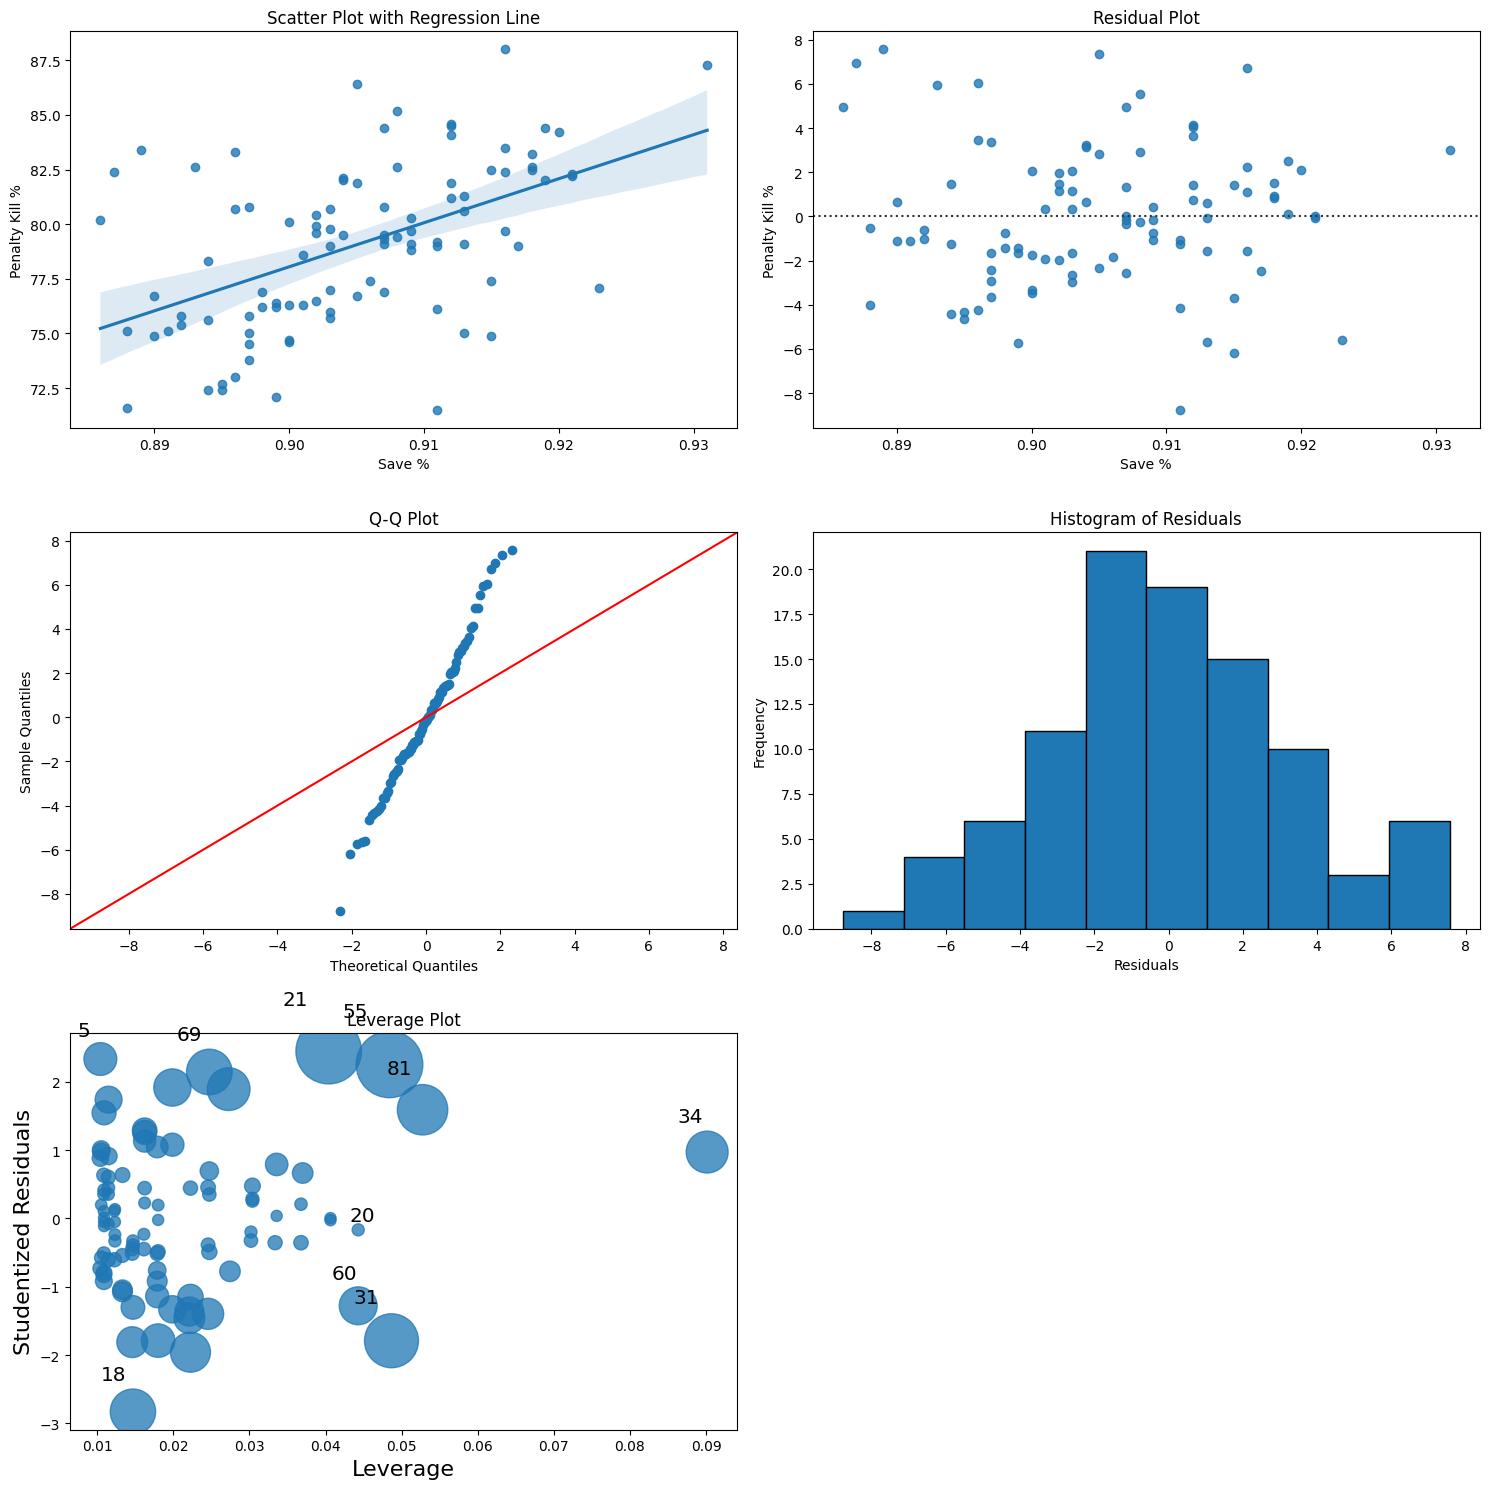

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x2 grid for the plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Scatter plot with regression line
sns.regplot(x='Save %', y='Penalty Kill %', data=dataframe, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot with Regression Line')

# Residual plot
sns.residplot(x='Save %', y='Penalty Kill %', data=dataframe, ax=axs[0, 1])
axs[0, 1].set_title('Residual Plot')

# Q-Q plot
sm.qqplot(model.resid, line='45', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot')

# Histogram of residuals
axs[1, 1].hist(model.resid, bins=10, edgecolor='k')
axs[1, 1].set_title('Histogram of Residuals')
axs[1, 1].set_xlabel('Residuals')
axs[1, 1].set_ylabel('Frequency')

# Leverage plot
sm.graphics.influence_plot(model, ax=axs[2, 0])
axs[2, 0].set_title('Leverage Plot')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

Repeat this for the remaining parameters. Next is a regression analysis for the Skating Distance Penalty Killing (per PIM).

In [8]:
# Define the dependent and independent variables
X = dataframe['Skating Distance Penalty Killing (per PIM)']
y = dataframe['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     19.79
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           2.37e-05
Time:                        15:59:52   Log-Likelihood:                -253.24
No. Observations:                  96   AIC:                             510.5
Df Residuals:                      94   BIC:                             515.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

Generate the plots for the Skating Distance Penalty Killing (per PIM) regression analysis.

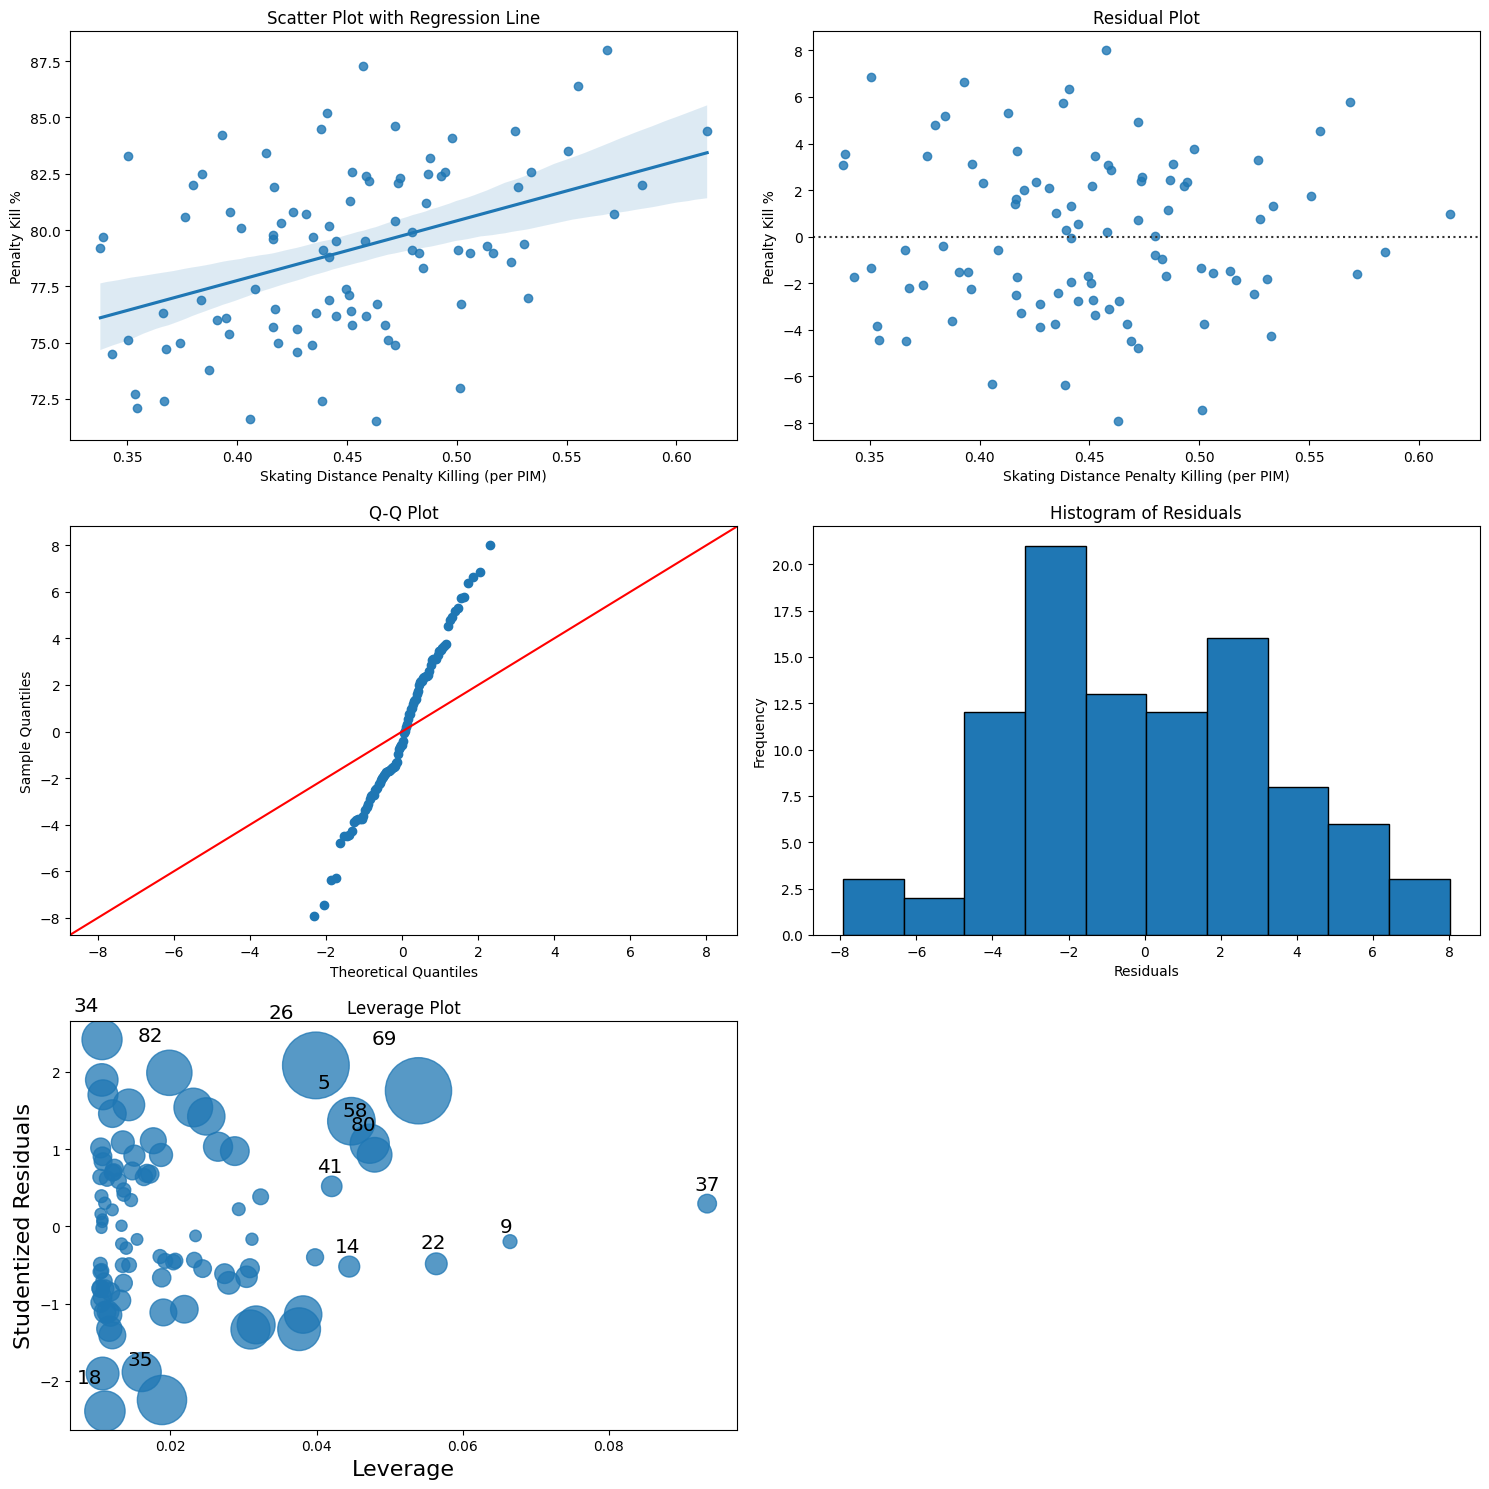

In [9]:
# Create a 3x2 grid for the plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Scatter plot with regression line
sns.regplot(x='Skating Distance Penalty Killing (per PIM)', y='Penalty Kill %', data=dataframe, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot with Regression Line')

# Residual plot
sns.residplot(x='Skating Distance Penalty Killing (per PIM)', y='Penalty Kill %', data=dataframe, ax=axs[0, 1])
axs[0, 1].set_title('Residual Plot')

# Q-Q plot
sm.qqplot(model.resid, line='45', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot')

# Histogram of residuals
axs[1, 1].hist(model.resid, bins=10, edgecolor='k')
axs[1, 1].set_title('Histogram of Residuals')
axs[1, 1].set_xlabel('Residuals')
axs[1, 1].set_ylabel('Frequency')

# Leverage plot
sm.graphics.influence_plot(model, ax=axs[2, 0])
axs[2, 0].set_title('Leverage Plot')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

SA/GP regression analysis.

In [10]:
# Define the dependent and independent variables
X = dataframe['SA/GP']
y = dataframe['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     34.76
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           5.81e-08
Time:                        16:00:26   Log-Likelihood:                -247.30
No. Observations:                  96   AIC:                             498.6
Df Residuals:                      94   BIC:                             503.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.4397      4.488     23.495      0.0

SA/GP regression analysis plots.

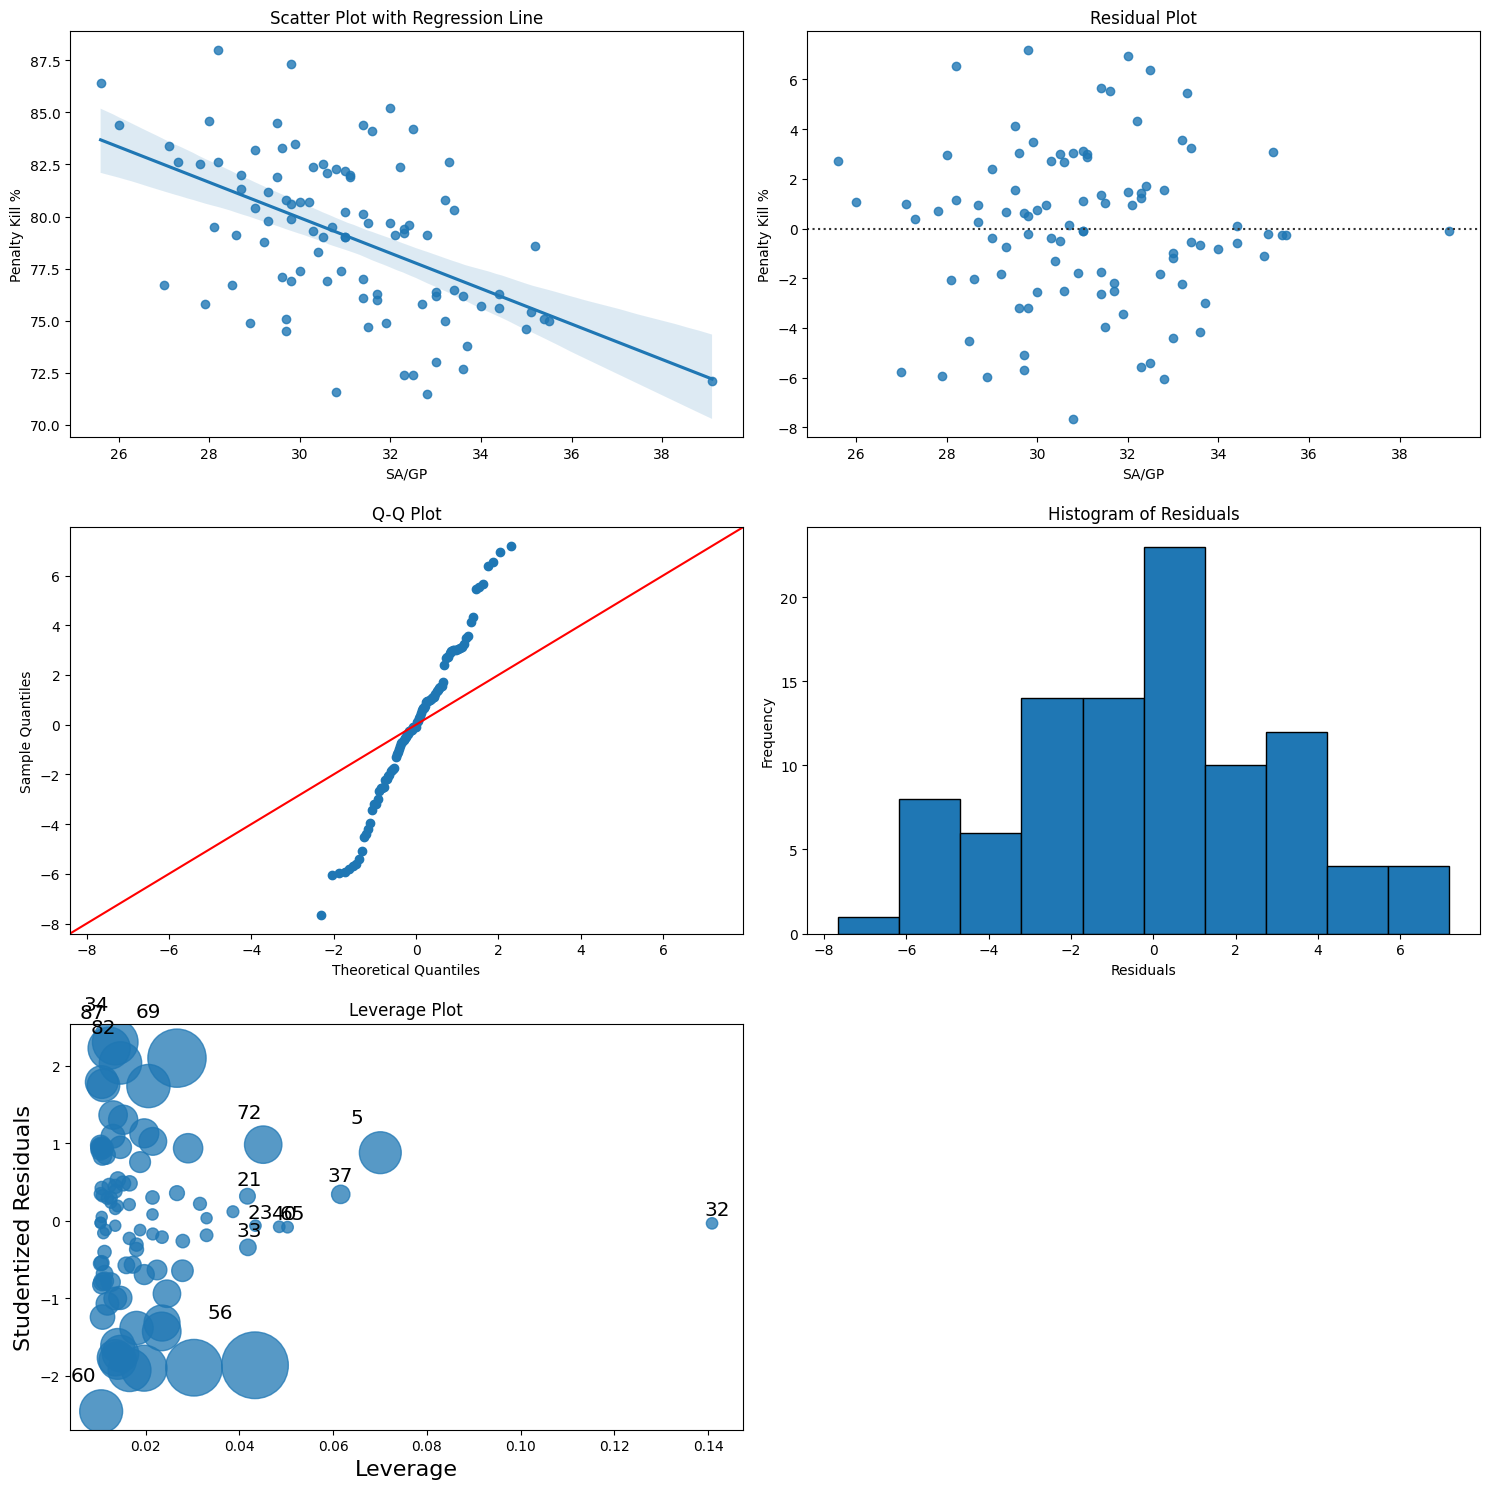

In [11]:
# Create a 3x2 grid for the plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Scatter plot with regression line
sns.regplot(x='SA/GP', y='Penalty Kill %', data=dataframe, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot with Regression Line')

# Residual plot
sns.residplot(x='SA/GP', y='Penalty Kill %', data=dataframe, ax=axs[0, 1])
axs[0, 1].set_title('Residual Plot')

# Q-Q plot
sm.qqplot(model.resid, line='45', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot')

# Histogram of residuals
axs[1, 1].hist(model.resid, bins=10, edgecolor='k')
axs[1, 1].set_title('Histogram of Residuals')
axs[1, 1].set_xlabel('Residuals')
axs[1, 1].set_ylabel('Frequency')

# Leverage plot
sm.graphics.influence_plot(model, ax=axs[2, 0])
axs[2, 0].set_title('Leverage Plot')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

Power Play % regression analysis.

In [12]:
# Define the dependent and independent variables
X = dataframe['Power Play%']
y = dataframe['Penalty Kill %']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Penalty Kill %   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     11.55
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           0.000995
Time:                        16:00:47   Log-Likelihood:                -256.84
No. Observations:                  96   AIC:                             517.7
Df Residuals:                      94   BIC:                             522.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          72.2190      2.043     35.356      

Power Play % regression analysis plots.

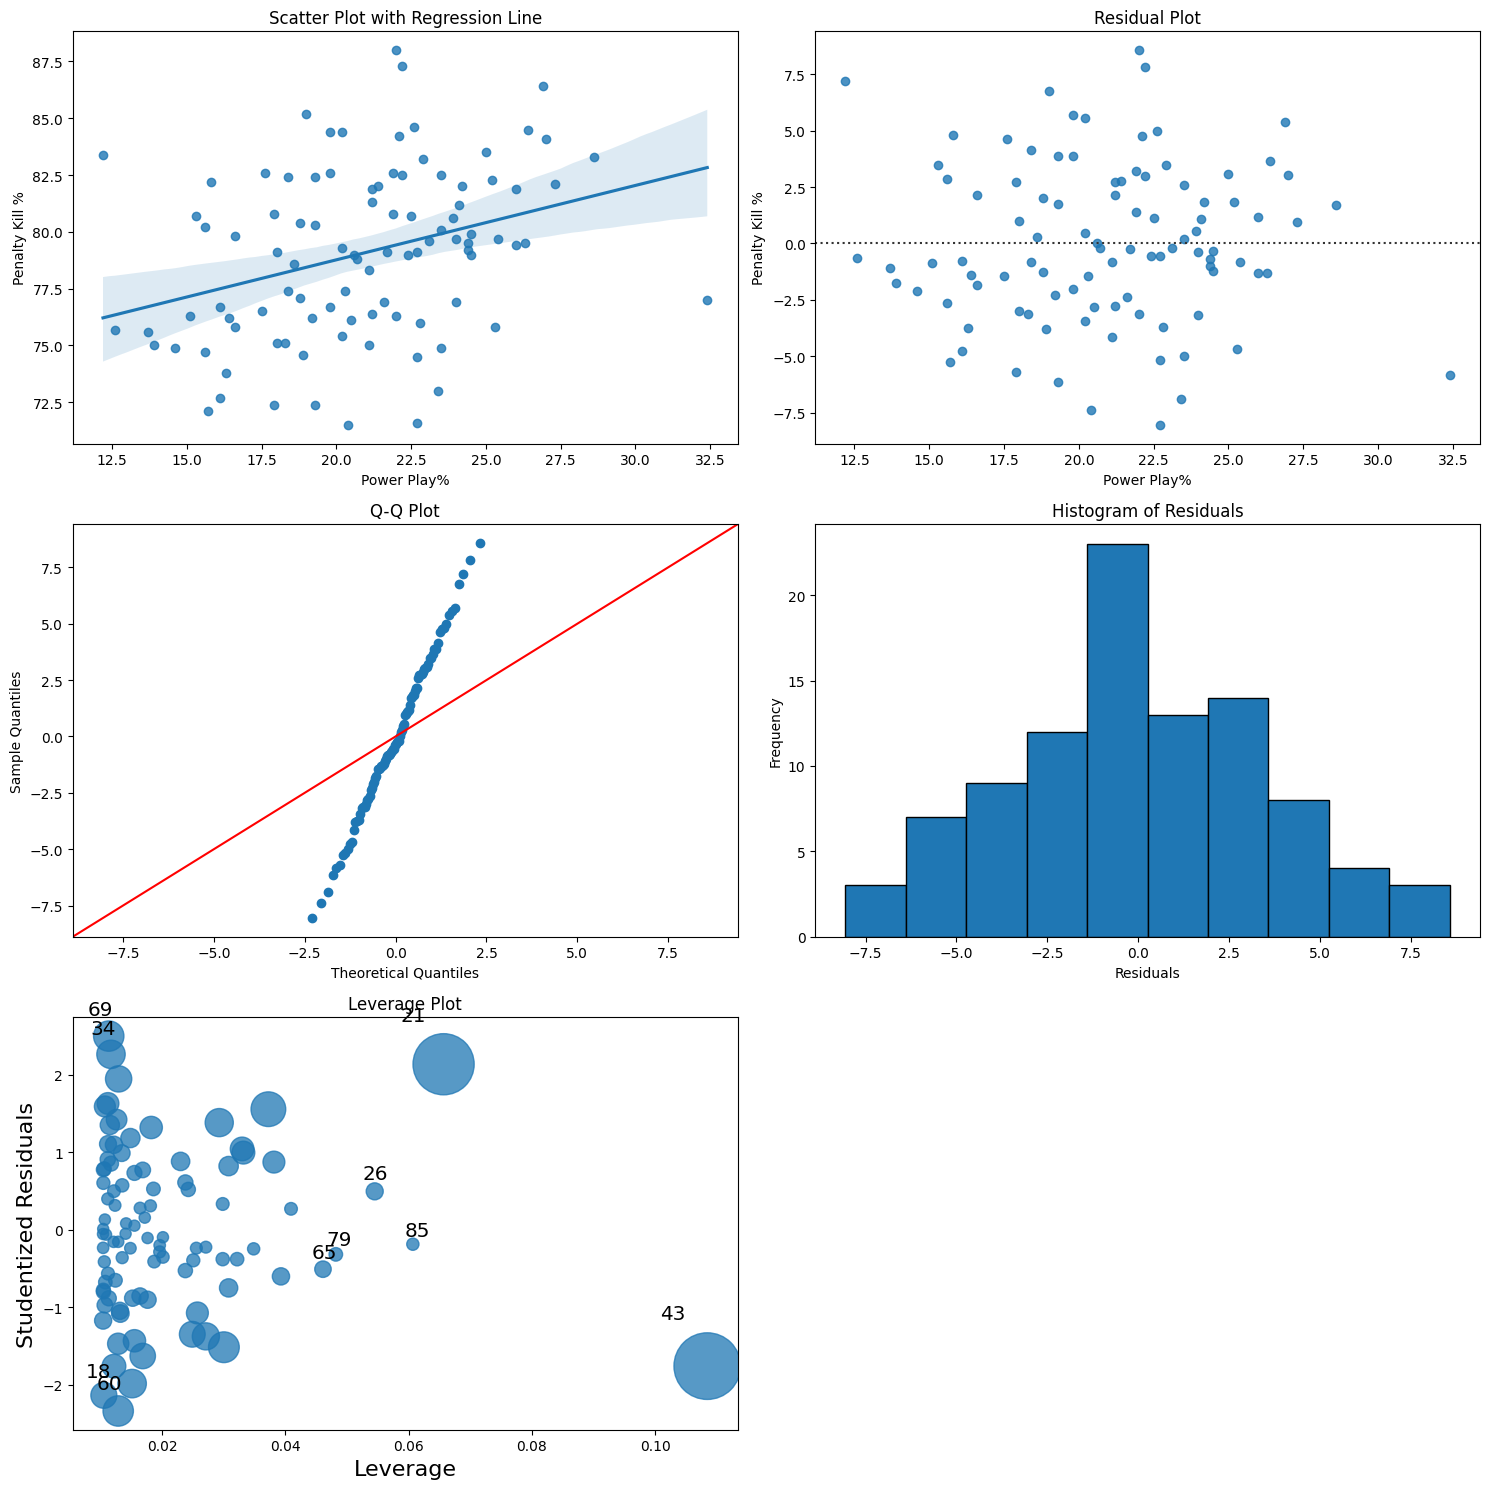

In [13]:
# Create a 3x2 grid for the plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Scatter plot with regression line
# Use regplot instead of lmplot since you want to plot on a specific axes
sns.regplot(x='Power Play%', y='Penalty Kill %', data=dataframe, ax=axs[0, 0])
axs[0, 0].set_title('Scatter Plot with Regression Line')

# Residual plot
sns.residplot(x='Power Play%', y='Penalty Kill %', data=dataframe, ax=axs[0, 1])
axs[0, 1].set_title('Residual Plot')

# Q-Q plot
sm.qqplot(model.resid, line='45', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot')

# Histogram of residuals
axs[1, 1].hist(model.resid, bins=10, edgecolor='k')
axs[1, 1].set_title('Histogram of Residuals')
axs[1, 1].set_xlabel('Residuals')
axs[1, 1].set_ylabel('Frequency')

# Leverage plot
sm.graphics.influence_plot(model, ax=axs[2, 0])
axs[2, 0].set_title('Leverage Plot')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()